<a href="https://colab.research.google.com/github/yGit741/comdepri/blob/main/accuracy_simulation_210121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import random

In [2]:
def NG(k=0.5, s=0.5, n=12,current_aspect = 1):
    T = s**n
    B = (s**n)+(k**n)
    neural_gain = (T/B)*((-1)**current_aspect)
    return neural_gain


In [3]:
stim_sample = ['global','local']
aspect = [1, 0] #0 is for global, 1 is for local

In [4]:
#RT function
def RT(k=0.5, global_s=0.55, local_s=0.45, n=12, upper_b=5, p_global=50, intention='global', congruent=True, max_iter=20000):
    #print ('RT in')
    p_local=100-p_global
    lower_b=-upper_b
    NG_sum = 0
    time = 0


    while NG_sum < upper_b and NG_sum > lower_b:
        current_sample = random.choices(stim_sample, weights=(p_global, p_local), k=1)

        #print(current_sample)
        current_aspect = 0 if current_sample == ['global'] else 1
        #print('aspect is', current_aspect)
        signal = global_s if current_sample == ['global'] else local_s
        #print('signal is', signal)
        gain = 0
        if congruent:
            if intention == 'global':
                gain = NG(k, signal, n, 0)
                NG_sum = NG_sum + gain
                time = time + 1
            else:
                gain = NG(k, signal, n, 1)
                NG_sum = NG_sum + gain
                time = time + 1
        else:
            gain = NG(k, signal, n, current_aspect)
            NG_sum = NG_sum + gain
            time = time + 1
        #print(time)
        #print(NG_sum)
        if time > max_iter:
            break

    if NG_sum >= upper_b:
        ans = 'global'
    if NG_sum <= lower_b:
        ans = 'local'
    #print ('RT out')
    return intention, ans, time


In [ ]:
def df_accuracy(N=100, global_s=0.55, local_s=0.45, n=12, p_global=50):
    base_array = np.zeros(N)
    accuracy_by_con = lambda x: RT(congruent = x, global_s=global_s, local_s=local_s, n=n, p_global=p_global)
    RT_array = np.array([accuracy_by_con(xi) for xi in base_array])
    df = pd.DataFrame(data=RT_array, columns=['intention', 'answer', 'time'])
    df['right'] = np.where(df['intention'] == df['answer'], 1, 0)
    df['con'] = base_array
    total = df['right'].sum()
    return total/N


In [ ]:
def plot_acc_by_prob(N=100, min=0, max=61, step = 1, global_s=0.55, local_s=0.45, n=12):
    prob_range = np.array(range(min,max,step))
    acc_by_prob = lambda y: df_accuracy(N=N, p_global=y, global_s=global_s, local_s=local_s, n=n)
    ar2 = np.array([acc_by_prob(yi) for yi in prob_range])
    plt.scatter(prob_range, ar2)
    plt.title('Accuracy by Probability')
    plt.xlabel('probability')
    plt.ylabel('accuracy')
    return plt.show()

Accuracy by Probability Plot:
This plot shows the accuracy (fraction of times global boundaries are reached) by the probability. Other parameters can be altered to show how they affect the accuracy.


In [ ]:
_=interact(plot_acc_by_prob, n=(1.,15,1.), global_s =(0,1.,0.02), local_s=(0,1.,0.02))
print(_)


interactive(children=(IntSlider(value=100, description='N', max=300, min=-100), IntSlider(value=0, description…

<function plot_acc_by_prob at 0x7fb435340cb0>


In [8]:
def df_average(N=100, global_s=0.55, local_s=0.45, n=12, p_global=48, intention = 'global'):
    incon_array = np.zeros(N)
    rt_by_con = lambda x: RT(congruent = x, global_s=global_s, local_s=local_s, n=n, p_global=p_global, intention = intention)
    ar = np.array([rt_by_con(xi) for xi in incon_array])
    df = pd.DataFrame(data=ar, columns=['intention', 'answer', 'time'])
    df['right'] = np.where(df['intention'] == df['answer'], 1, 0)
    df['con'] = incon_array
    #print('whole dataframe', '\n' , df)
    df['time'] = pd.to_numeric(df['time'])
    #df1 = df.loc[lambda df: df['right'] == 1]
    #accuracy = df1.shape[0]/N
    #print('acc by cut', accuracy)
    mean_by_right = df[['right', 'time']].groupby('right').agg(['count', 'mean']).reset_index()
    #print("mean by right and wrong", '\n', mean_by_right)
    #print(list(mean_by_right.columns))  
    #print(mean_by_right.shape)

    
    if 0 in mean_by_right[('right', '')].values:
      accuracy_of_false_decisions_list = mean_by_right[mean_by_right[('right','')] == 0][('time', 'count')].values.tolist()
      #print(accuracy_of_false_decisions_list)
      accuracy_of_false_decisions = accuracy_of_false_decisions_list[0]/N
      average_of_false_decisions_list = mean_by_right[mean_by_right[('right','')] == 0][('time', 'mean')].values.tolist()
      average_of_false_decisions = average_of_false_decisions_list[0]
    else:
      accuracy_of_false_decisions = 0
      average_of_false_decisions = 'none'
     

    if 1 in mean_by_right[('right', '')].values:
      accuracy_of_right_decisions_list = mean_by_right[mean_by_right[('right','')] == 1][('time', 'count')].values.tolist()
      #print(accuracy_of_right_decisions_list)
      accuracy_of_right_decisions = accuracy_of_right_decisions_list[0]/N
      average_of_right_decisions_list = mean_by_right[mean_by_right[('right','')] == 1][('time', 'mean')].values.tolist()
      average_of_right_decisions = average_of_right_decisions_list[0]
    else:
      accuracy_of_right_decisions = 0
      average_of_right_decisions = 'none'
    #print(accuracy_of_right_decisions)
    #print(accuracy_of_false_decisions)
    #print(average_of_right_decisions)
    #print(average_of_false_decisions)  

 

    return accuracy_of_right_decisions, average_of_right_decisions, average_of_false_decisions 

    


print('av time is',df_average(n=12, p_global = 15))

av time is (0, 'none', 66.47)


[['0.33' '81.12121212121212' '105.14925373134328']
 ['0.14' '136.85714285714286' '92.69767441860465']
 ['0.1' '47.9' '68.85555555555555']
 ['0' 'none' '55.34']
 ['0.01' '35.0' '49.74747474747475']
 ['0' 'none' '38.05']
 ['0' 'none' '34.95']
 ['0' 'none' '28.45']
 ['0' 'none' '23.69']
 ['0' 'none' '24.68']
 ['0' 'none' '23.54']
 ['0' 'none' '20.25']
 ['0' 'none' '19.05']
 ['0' 'none' '18.8']
 ['0' 'none' '17.04']
 ['0' 'none' '16.86']
 ['0' 'none' '16.08']
 ['0' 'none' '15.56']
 ['0' 'none' '15.03']
 ['0' 'none' '15.34']
 ['0' 'none' '15.06']
 ['0' 'none' '13.97']
 ['0' 'none' '13.63']]
now in float: 
 [81.12121212121212, 136.85714285714286, 47.9, nan, 35.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


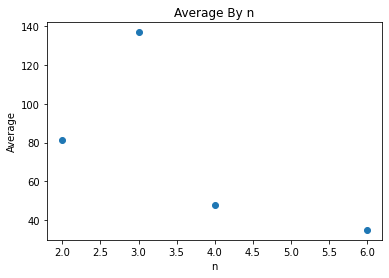

Local Intention by n (global prob. = 0.18) 
 (None, [81.12121212121212, 136.85714285714286, 47.9, nan, 35.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24]))
[['0.82' '104.84146341463415' '108.22222222222223']
 ['0.95' '70.3157894736842' '63.4']
 ['0.96' '73.52083333333333' '60.75']
 ['0.99' '48.21212121212121' '49.0']
 ['1.0' '42.56' 'none']
 ['1.0' '36.32' 'none']
 ['1.0' '30.52' 'none']
 ['1.0' '28.26' 'none']
 ['1.0' '23.43' 'none']
 ['1.0' '20.97' 'none']
 ['1.0' '21.9' 'none']
 ['1.0' '18.89' 'none']
 ['1.0' '19.12' 'none']
 ['1.0' '17.99' 'none']
 ['1.0' '17.51' 'none']
 ['1.0' '17.34' 'none']
 ['1.0' '16.26' 'none']
 ['1.0' '15.81' 'none']
 ['1.0' '14.9' 'none']
 ['1.0' '14.89' 'none']
 ['1.0' '13.63' 'none']
 ['1.0' '13.52' 'none']
 ['1.0' '13.85' 'none']]
now in float: 
 [104.84146341463415, 70.3157894736842, 73.52083333333333, 

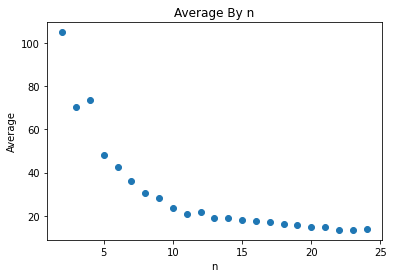

Global Intention by n (global prob. = 0.47) 
 (None, [104.84146341463415, 70.3157894736842, 73.52083333333333, 48.21212121212121, 42.56, 36.32, 30.52, 28.26, 23.43, 20.97, 21.9, 18.89, 19.12, 17.99, 17.51, 17.34, 16.26, 15.81, 14.9, 14.89, 13.63, 13.52, 13.85], array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24]))
[['0.69' '105.44927536231884' '134.80645161290323']
 ['0.89' '82.51685393258427' '79.63636363636364']
 ['0.94' '65.31914893617021' '63.166666666666664']
 ['0.97' '55.43298969072165' '34.333333333333336']
 ['1.0' '43.61' 'none']
 ['1.0' '38.03' 'none']
 ['1.0' '31.01' 'none']
 ['1.0' '29.23' 'none']
 ['1.0' '27.75' 'none']
 ['1.0' '22.19' 'none']
 ['1.0' '22.56' 'none']
 ['1.0' '21.86' 'none']
 ['1.0' '19.8' 'none']
 ['1.0' '21.01' 'none']
 ['1.0' '16.91' 'none']
 ['1.0' '17.74' 'none']
 ['1.0' '16.5' 'none']
 ['1.0' '16.01' 'none']
 ['1.0' '14.65' 'none']
 ['1.0' '14.68' 'none']
 ['1.0' '14.29' 'none']
 ['1.0' '14.61' 'non

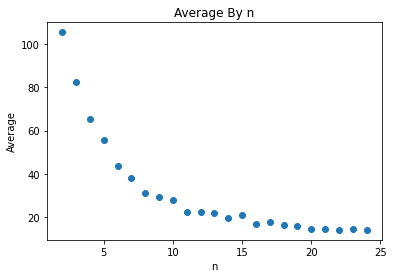

[['1.0' '19.42' 'none']
 ['1.0' '21.3' 'none']
 ['1.0' '24.02' 'none']
 ['1.0' '26.65' 'none']
 ['1.0' '30.09' 'none']
 ['1.0' '34.92' 'none']
 ['1.0' '44.65' 'none']
 ['1.0' '52.17' 'none']
 ['1.0' '62.64' 'none']
 ['0.98' '70.85714285714286' '33.5']
 ['0.93' '101.86021505376344' '83.0']
 ['0.86' '114.73255813953489' '108.85714285714286']
 ['0.62' '208.48387096774192' '188.05263157894737']
 ['0.41' '162.29268292682926' '181.27118644067798']
 ['0.17' '218.1764705882353' '201.85542168674698']
 ['0.09' '136.44444444444446' '144.93406593406593']
 ['0.01' '151.0' '115.14141414141415']
 ['0' 'none' '91.43']
 ['0' 'none' '81.82']
 ['0' 'none' '67.41']
 ['0' 'none' '61.58']
 ['0' 'none' '54.86']
 ['0' 'none' '53.09']]
now in float: 
 [19.42, 21.3, 24.02, 26.65, 30.09, 34.92, 44.65, 52.17, 62.64, 70.85714285714286, 101.86021505376344, 114.73255813953489, 208.48387096774192, 162.29268292682926, 218.1764705882353, 136.44444444444446, 151.0, nan, nan, nan, nan, nan, nan]


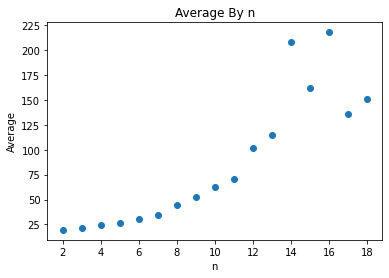

(105.44927536231884, 19.42)
(82.51685393258427, 21.3)
(65.31914893617021, 24.02)
(55.43298969072165, 26.65)
(43.61, 30.09)
(38.03, 34.92)
(31.01, 44.65)
(29.23, 52.17)
(27.75, 62.64)
(22.19, 70.85714285714286)
(22.56, 101.86021505376344)
(21.86, 114.73255813953489)
(19.8, 208.48387096774192)
(21.01, 162.29268292682926)
(16.91, 218.1764705882353)
(17.74, 136.44444444444446)
(16.5, 151.0)
(16.01, nan)
(14.65, nan)
(14.68, nan)
(14.29, nan)
(14.61, nan)
(14.12, nan)
[-86.02927536231884, -61.21685393258427, -41.29914893617021, -28.78298969072165, -13.52, -3.1099999999999994, 13.639999999999997, 22.94, 34.89, 48.66714285714286, 79.30021505376344, 92.87255813953489, 188.6838709677419, 141.28268292682927, 201.2664705882353, 118.70444444444446, 134.5, nan, nan, nan, nan, nan, nan]


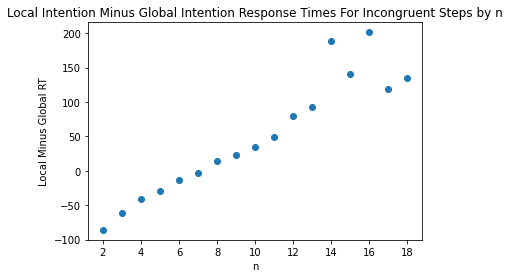

None


In [22]:
from numpy.core.numeric import NaN
def plot_average_by_n(N=100, min=2, max=25, step = 1, global_s=0.55, local_s=0.45, p_global =50, intention = 'global'):
    n_range = np.array(range(min,max,step))
    av_by_n = lambda y: df_average(N=N, p_global=p_global, global_s=global_s, local_s=local_s, n=y, intention=intention)
    ar_av = np.array([av_by_n(yi) for yi in n_range])
    print(ar_av)
    average_for_plot = ar_av[:,1]
    average_for_plot_list = []
    for i in average_for_plot:
      if i == 'none':
        average_for_plot_list.append(np.nan)
      else:
        average_for_plot_list.append(float(i)) 
    #average_for_plot_float_array = [float(i) for i in average_for_plot if i != 'none']
    #print("average for plot:", '\n', average_for_plot)
    print("now in float:", '\n', average_for_plot_list)
    plt.scatter(n_range, average_for_plot_list)
    plt.title('Average By n')
    plt.xlabel('n')
    plt.ylabel('Average')
    plot = plt.show()
    return plot, average_for_plot_list, n_range

print("Local Intention by n (global prob. = 0.18)", '\n', plot_average_by_n(p_global=47, intention = 'local'))  
print("Global Intention by n (global prob. = 0.47)", '\n', plot_average_by_n(p_global=48, intention = 'global'))


def almost_global_precedence_by_n(p_global_for_global=47, p_global_for_local=18 ):
  p1, global_array_by_n, n_range = plot_average_by_n(p_global=p_global_for_global, intention = 'global')
  p2, local_array_by_n, n_range_2 = plot_average_by_n(p_global = p_global_for_local, intention = 'local')
  almost_global_precedence_list = []
  for i in zip(global_array_by_n, local_array_by_n):
    print(i)
    if np.nan in i: 
      almost_global_precedence_list.append(np.nan)
    else:
      almost_global_precedence_list.append(i[1]-i[0])
  print(almost_global_precedence_list)    
  plt.scatter(n_range, almost_global_precedence_list) 
  plt.ylabel('Local Minus Global RT') 
  plt.xlabel('n') 
  plt.title("Local Intention Minus Global Intention Response Times For Incongruent Steps by n")
  plt.show()
  return

print(almost_global_precedence_by_n())  

      



Streaming output truncated to the last 5000 lines.
96    global  global   31      1  0.0
97    global  global   16      1  0.0
98    global  global   39      1  0.0
99    global  global   32      1  0.0

[100 rows x 5 columns]
mean by right and wrong 
   right  time       
        count   mean
0     1   100  25.43
[('right', ''), ('time', 'count'), ('time', 'mean')]
(1, 3)
[100]
1.0
0
25.43
none
whole dataframe 
    intention  answer time  right  con
0     global  global   14      1  0.0
1     global  global   19      1  0.0
2     global  global   29      1  0.0
3     global  global   35      1  0.0
4     global  global   20      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   11      1  0.0
96    global  global   26      1  0.0
97    global  global   19      1  0.0
98    global  global   33      1  0.0
99    global  global   19      1  0.0

[100 rows x 5 columns]
mean by right and wrong 
   right  time       
        count   mean
0     1   100  26.39
[('right', '')

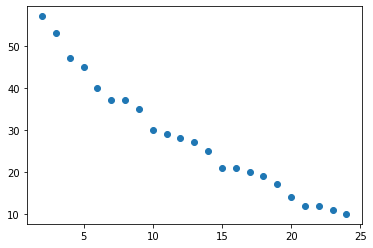

In [ ]:
def optimal_prob_df(globalmin = 0.53, globalmax=0.7, localmin=0.2, localmax=0.49, acc_bound = 0.2, av_bound = 100):
    lst_of_prob = []

    cols = ["prob", "global", "local","accuracy", "av global", "av local" ]


    prob_array = np.array(range(2,25,1))
    print(prob_array)
    glob_array = np.arange(globalmin,globalmax,0.02)
    print(glob_array)
    loc_array = np.arange(localmin,localmax,0.02)
    samples = len(glob_array)*len(loc_array)
    print(samples)
    print(loc_array)
    amount_of_true_lst=[]
    for p in prob_array:
        d_for_accuracy = []
        for x in glob_array:
            for y in loc_array:
              acc, av_global, av_local = df_average(N=100, global_s=x, local_s=y, p_global=p)
              if acc > acc_bound:
                  d_for_accuracy.append([x,y,False, acc, av_global, av_local])
              else:
                  d_for_accuracy.append([x,y,True, acc, av_global, av_local])
        print(d_for_accuracy)
        prob_work_array = np.array([d_for_accuracy[i][2] for i in range(samples)])
        print('probabililty is',p)
        print(prob_work_array)
        total_true = prob_work_array.sum()
        amount_of_true_lst.append(total_true)
        print('amount of true is', total_true)
    amount_of_true_array = np.array(amount_of_true_lst)
    print(amount_of_true_array)
    plt.scatter(prob_array, amount_of_true_array)
    plt.show()
                #d.append([p,x,y,acc])
    #optimal_df = pd.DataFrame(data=d, columns=cols)
    return

optimal_prob_df()

In [ ]:
#optimal_prob_by_average
def optimal_prob_by_average(globalmin = 0.53, globalmax=0.7, localmin=0.2, localmax=0.49, average_bound = 200):
    lst_of_prob = []

    cols = ["prob", "global", "local","accuracy"]


    prob_array = np.array(range(2,25,1))
    print(prob_array)
    glob_array_for_av = np.arange(globalmin,globalmax,0.02)
    print(glob_array_for_av)
    loc_array = np.arange(localmin,localmax,0.02)
    samples = len(glob_array_for_av)*len(loc_array_for_av)
    print(samples)
    print(loc_array)
    amount_of_true_lst=[]
    for p in prob_array:
        d = []
        for x in glob_array:
            for y in loc_array:
                acc = df_accuracy(N=100, global_s=x, local_s=y, p_global=p)
                if acc > acc_bound:
                    d.append([x,y,False, acc])
                else:
                    d.append([x,y,True, acc])
        print(d)
        prob_work_array = np.array([d[i][2] for i in range(samples)])
        print('probabililty is',p)
        print(prob_work_array)
        total_true = prob_work_array.sum()
        amount_of_true_lst.append(total_true)
        print('amount of true is', total_true)
    amount_of_true_array = np.array(amount_of_true_lst)
    print(amount_array)
    plt.scatter(prob_array, amount_of_true_array)
    plt.show()
                #d.append([p,x,y,acc])
    #optimal_df = pd.DataFrame(data=d, columns=cols)
    return